In [1]:
!pip install numpy pandas tensorflow scikit-learn
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
df = pd.read_csv(url)
print(df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [3]:
#Preprocess Data
def prepare_data(subject_id):
    subject_data = df[df['subject#'] == subject_id]
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(subject_data[['total_UPDRS', 'Jitter(%)', 'Shimmer']])
    X, y = [], []
    for i in range(3, len(scaled)):
        X.append(scaled[i-3:i, :])
        y.append(scaled[i, 0])  # Predict next UPDRS
    return np.array(X), np.array(y)

X, y = prepare_data(1)  # Use subject 1 for demo
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [4]:
#Training Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - loss: 0.2815 - val_loss: 0.3368
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2279 - val_loss: 0.2618
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1787 - val_loss: 0.1905
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1293 - val_loss: 0.1262
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0815 - val_loss: 0.0793
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0658 - val_loss: 0.0622
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0751 - val_loss: 0.0611
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0670 - val_loss: 0.0616
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0592 - val_loss: 0.0661
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0678 - val_loss: 0.0732
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0590 - val_loss: 0.0746
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0602 - val_loss: 0.0718


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


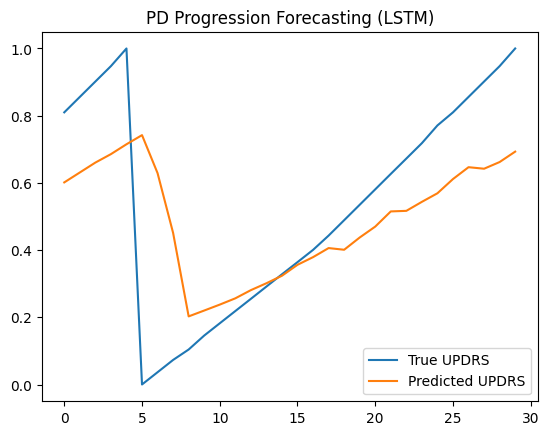

In [5]:
#Plotting Results
import matplotlib.pyplot as plt
plt.plot(y_test, label='True UPDRS')
plt.plot(model.predict(X_test), label='Predicted UPDRS')
plt.legend()
plt.title('PD Progression Forecasting (LSTM)')
plt.show()